In [0]:
from fastai import *
from fastai.vision import *

In [0]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import IPython
IPython.display.Audio("/content/drive/My Drive/GunShot/test/test6.mp3")

In [0]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import specgram
import librosa
import librosa.display
import numpy as np
def create_fold_spectrograms():
    spectrogram_path = Path('/content/drive/My Drive/GunShot/')  
    audio_path = Path('/content/drive/My Drive/GunShot/test/')  
    for audio_file in list(Path(audio_path).glob('*.mp3')):
        samples, sample_rate = librosa.load(audio_file)
        fig = plt.figure(figsize=[0.72,0.72])
        ax = fig.add_subplot(111)
        ax.axes.get_xaxis().set_visible(False)
        ax.axes.get_yaxis().set_visible(False)
        ax.set_frame_on(False)
        filename  = spectrogram_path/Path(audio_file).name.replace('.mp3','.png')
        S = librosa.feature.melspectrogram(y=samples, sr=sample_rate)
        librosa.display.specshow(librosa.power_to_db(S, ref=np.max))
        plt.savefig(filename, dpi=400, bbox_inches='tight',pad_inches=0)
        plt.close('all')

In [0]:
create_fold_spectrograms()

In [0]:
# folder = 'nonGun'
# file = 'random.csv'

In [0]:
path = Path('/content/drive/My Drive/GunShot/test')
# dest = path/folder
# dest.mkdir(parents=True, exist_ok=True)

In [0]:
path.ls()

[PosixPath('/content/drive/My Drive/GunShot/test/test.mp3'),
 PosixPath('/content/drive/My Drive/GunShot/test/test2.mp3')]

In [0]:
# download_images(path/file, dest, max_pics=500)

In [0]:
# verify_images(path/folder, delete=True, max_size=500)

In [0]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [0]:
data.classes

['gun', 'non gun']

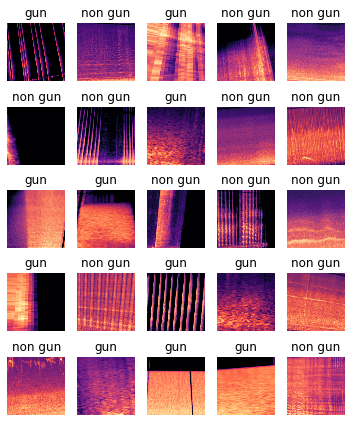

In [0]:
data.show_batch(rows=5, figsize=(5,6))

In [0]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['gun', 'non gun'], 2, 2087, 521)

In [0]:
import os

In [0]:
path, dirs, files = next(os.walk('/content/drive/My Drive/GunShot/dataset/gun/'))
file_count = len(files)

In [0]:
print(file_count)

608


In [0]:
from fastai.metrics import error_rate, accuracy

In [0]:
learn = cnn_learner(data, models.resnet50, metrics=accuracy)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth
100%|██████████| 97.8M/97.8M [00:01<00:00, 76.3MB/s]


In [0]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,accuracy,time
0,0.498642,0.127842,0.967370,05:44
1,0.297514,0.066820,0.971209,00:38
2,0.193615,0.080352,0.965451,00:38
3,0.134032,0.058392,0.975048,00:38


In [0]:
learn.save('stage-1')

In [0]:
learn.unfreeze()

In [0]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Min numerical gradient: 1.32E-06
Min loss divided by 10: 5.25E-06


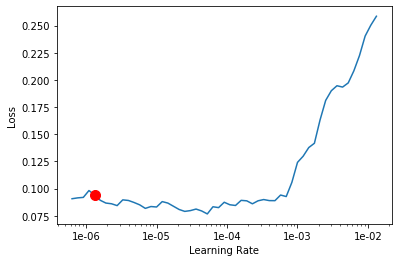

In [0]:
learn.recorder.plot(suggestion= True)

In [0]:
learn.fit_one_cycle(2, max_lr = slice(1e-6,1e-5))

epoch,train_loss,valid_loss,accuracy,time
0,0.081352,0.054738,0.971209,00:50
1,0.072155,0.044250,0.984645,00:50


In [0]:
learn.save('stage-2')

In [0]:
learn.fit_one_cycle(2, max_lr = slice(1e-6,1e-5))

epoch,train_loss,valid_loss,accuracy,time
0,0.069156,0.042150,0.982726,00:50
1,0.074011,0.040530,0.984645,00:50


In [0]:
learn.fit_one_cycle(4, max_lr = slice(1e-6,1e-5))

epoch,train_loss,valid_loss,accuracy,time
0,0.049927,0.039738,0.984645,00:50
1,0.061518,0.035547,0.986564,00:50
2,0.056182,0.033683,0.986564,00:50
3,0.056638,0.033492,0.986564,00:50


In [0]:
learn.save('stage-3')

In [0]:
learn.fit_one_cycle(4, max_lr = slice(1e-6,1e-5))

epoch,train_loss,valid_loss,accuracy,time
0,0.047696,0.032697,0.984645,00:50
1,0.061321,0.027519,0.986564,00:50
2,0.059754,0.025358,0.988484,00:50
3,0.053487,0.025141,0.986564,00:50


In [0]:
learn.save('stage-4')

In [0]:
learn.fit_one_cycle(3, max_lr = slice(1e-6,1e-5))

epoch,train_loss,valid_loss,accuracy,time
0,0.070634,0.027704,0.986564,00:50
1,0.054947,0.027253,0.988484,00:50
2,0.046620,0.023687,0.992322,00:50


In [0]:
learn.save('stage-5')

In [0]:
learn.fit_one_cycle(2, max_lr = slice(1e-6,1e-5))

epoch,train_loss,valid_loss,accuracy,time
0,0.039710,0.020616,0.994242,00:50
1,0.040223,0.020830,0.994242,00:50


In [0]:
learn.save('stage-6')

In [0]:
learn.fit_one_cycle(3, max_lr = slice(1e-6,1e-5))

epoch,train_loss,valid_loss,accuracy,time
0,0.031165,0.022169,0.990403,00:50
1,0.036670,0.018078,0.994242,00:50
2,0.036532,0.020768,0.990403,00:50


In [0]:
learn.fit_one_cycle(3, max_lr = slice(1e-6,1e-5))

epoch,train_loss,valid_loss,accuracy,time
0,0.034511,0.018902,0.994242,00:50
1,0.039778,0.016228,0.994242,00:50
2,0.033910,0.017018,0.994242,00:50


In [0]:
learn.save('stage-7')

In [0]:
learn.fit_one_cycle(2, max_lr = slice(1e-6,1e-5))

epoch,train_loss,valid_loss,accuracy,time
0,0.029044,0.018857,0.994242,00:50
1,0.028898,0.019509,0.994242,00:50


In [0]:
learn.load('stage-7');

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

In [0]:
interp.plot_confusion_matrix()

In [0]:
learn.export()

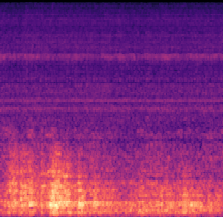

In [0]:
img = open_image('/content/drive/My Drive/GunShot/dataset/non gun/1-101296-A-19.png')
img


In [0]:
pred_class,pred_idx,outputs = learn.predict(img)
pred_class

Category non gun